# Dataset

In [46]:
import yfinance as yf
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [47]:


ko = yf.Ticker("KO")

ko_hist = ko.history('MAX')

ko_hist.reset_index(inplace=True)

ko_hist,ko_hist.shape

(                           Date       Open       High        Low      Close  \
 0     1962-01-02 00:00:00-05:00   0.048528   0.049849   0.048528   0.048528   
 1     1962-01-03 00:00:00-05:00   0.047807   0.047807   0.046726   0.047447   
 2     1962-01-04 00:00:00-05:00   0.047567   0.048168   0.047567   0.047807   
 3     1962-01-05 00:00:00-05:00   0.047807   0.048408   0.046606   0.046726   
 4     1962-01-08 00:00:00-05:00   0.046366   0.046366   0.045345   0.046246   
 ...                         ...        ...        ...        ...        ...   
 15578 2023-11-20 00:00:00-05:00  57.049999  57.580002  56.959999  57.400002   
 15579 2023-11-21 00:00:00-05:00  57.459999  58.040001  57.330002  58.029999   
 15580 2023-11-22 00:00:00-05:00  58.259998  58.540001  58.130001  58.419998   
 15581 2023-11-24 00:00:00-05:00  58.459999  58.750000  58.340000  58.570000   
 15582 2023-11-27 00:00:00-05:00  58.540001  58.689999  58.270000  58.410000   
 
          Volume  Dividends  Stock Spl

<Axes: xlabel='Date'>

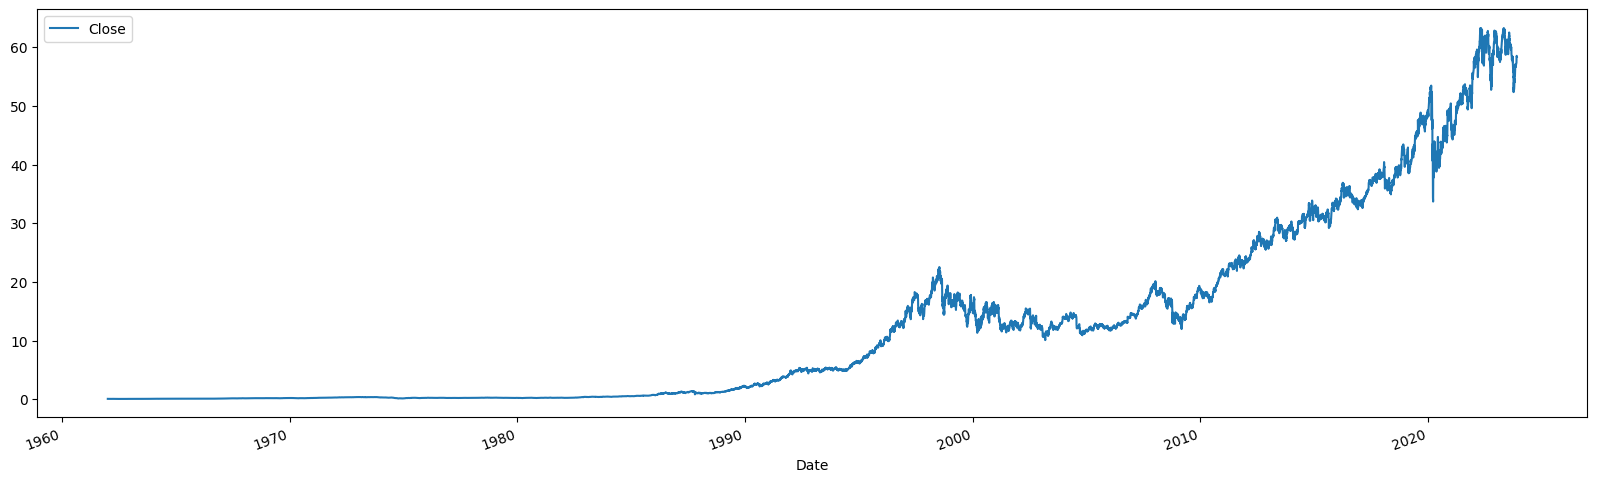

In [48]:
%matplotlib inline
ko_hist.plot(x='Date', y='Close', kind='line', figsize=(20,6), rot=20)

In [49]:
ko_hist = ko_hist[ko_hist.Date > '01-01-1990']

# Extracting the closing prices of each day
FullData=ko_hist[['Close']].values
print(FullData[0:5])
 
# Feature Scaling for fast training of neural networks
from sklearn.preprocessing import MinMaxScaler
 
# Choosing between Standardization or normalization
#sc = StandardScaler()
sc=MinMaxScaler()
 
DataScaler = sc.fit(FullData)
X=DataScaler.transform(FullData)
#X=FullData
 
print('### After Normalization ###')
X[0:5]

[[2.21716523]
 [2.18518543]
 [2.17452645]
 [2.15676045]
 [2.20295238]]
### After Normalization ###


array([[0.00543658],
       [0.00491603],
       [0.00474253],
       [0.00445334],
       [0.00520523]])

# Modelo para predecir 1 dia

In [50]:
# split into samples
X_samples = list()
y_samples = list()

NumerOfRows = len(X)
TimeSteps=50  # next day's Price Prediction is based on last how many past day's prices

# Iterate thru the values to create combinations
for i in range(TimeSteps , NumerOfRows , 1):
    x_sample = X[i-TimeSteps:i]
    y_sample = X[i]
    X_samples.append(x_sample)
    y_samples.append(y_sample)

################################################
# Reshape the Input as a 3D (number of samples, Time Steps, Features)
X_data=np.array(X_samples)
X_data=X_data.reshape(X_data.shape[0],X_data.shape[1], 1)
print('\n#### Input Data shape ####')
print(X_data.shape)

# We do not reshape y as a 3D data  as it is supposed to be a single column only
y_data=np.array(y_samples)
y_data=y_data.reshape(y_data.shape[0], 1)
print('\n#### Output Data shape ####')
print(y_data.shape)


#### Input Data shape ####
(8492, 50, 1)

#### Output Data shape ####
(8492, 1)


In [51]:
# Choosing the number of testing data records
TestingRecords=5
 
# Splitting the data into train and test
X_train=X_data[:-TestingRecords]
X_test=X_data[-TestingRecords:]
y_train=y_data[:-TestingRecords]
y_test=y_data[-TestingRecords:]
 
############################################
 
# Printing the shape of training and testing
print('\n#### Training Data shape ####')
print(X_train.shape)
print(y_train.shape)
print('\n#### Testing Data shape ####')
print(X_test.shape)
print(y_test.shape)


#### Training Data shape ####
(8487, 50, 1)
(8487, 1)

#### Testing Data shape ####
(5, 50, 1)
(5, 1)


In [52]:
# Visualizing the input and output being sent to the LSTM model
for inp, out in zip(X_train[0:2], y_train[0:2]):
    print(inp,'--', out)

[[0.00543658]
 [0.00491603]
 [0.00474253]
 [0.00445334]
 [0.00520523]
 [0.00491603]
 [0.00468471]
 [0.00468471]
 [0.00341232]
 [0.00283395]
 [0.0031231 ]
 [0.00289177]
 [0.00271827]
 [0.00294963]
 [0.0019664 ]
 [0.00219774]
 [0.00202425]
 [0.00115671]
 [0.00057834]
 [0.00092537]
 [0.        ]
 [0.00121454]
 [0.00115671]
 [0.00144586]
 [0.0013302 ]
 [0.00115671]
 [0.00150371]
 [0.00144586]
 [0.00127237]
 [0.00104101]
 [0.00034699]
 [0.00040484]
 [0.00150371]
 [0.00104101]
 [0.00104101]
 [0.00104101]
 [0.00069401]
 [0.00080969]
 [0.00138804]
 [0.00167723]
 [0.0019664 ]
 [0.00208206]
 [0.00185073]
 [0.00185073]
 [0.00242909]
 [0.00237125]
 [0.00283395]
 [0.00284558]
 [0.00290372]
 [0.00278745]] -- [0.00302005]
[[0.00491603]
 [0.00474253]
 [0.00445334]
 [0.00520523]
 [0.00491603]
 [0.00468471]
 [0.00468471]
 [0.00341232]
 [0.00283395]
 [0.0031231 ]
 [0.00289177]
 [0.00271827]
 [0.00294963]
 [0.0019664 ]
 [0.00219774]
 [0.00202425]
 [0.00115671]
 [0.00057834]
 [0.00092537]
 [0.        ]
 [0

In [53]:

# Defining Input shapes for LSTM
TimeSteps=X_train.shape[1]
TotalFeatures=X_train.shape[2]
print("Number of TimeSteps:", TimeSteps)
print("Number of Features:", TotalFeatures)

Number of TimeSteps: 50
Number of Features: 1


In [54]:
keras.utils.set_random_seed(42) 

# Initialising the RNN
regressor = Sequential()
 
# Adding the First input hidden layer and the LSTM layer
# return_sequences = True, means the output of every time step to be shared with hidden next layer
regressor.add(LSTM(units = 10, activation = 'tanh', input_shape = (TimeSteps, TotalFeatures), return_sequences=True))
 
# Adding the Second Second hidden layer and the LSTM layer
regressor.add(LSTM(units = 5, activation = 'relu', input_shape = (TimeSteps, TotalFeatures), return_sequences=True))
 
# Adding the Second Third hidden layer and the LSTM layer
regressor.add(LSTM(units = 5, activation = 'relu', return_sequences=False ))
 
 
# Adding the output layer
regressor.add(Dense(units = 1))
 
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
 
##################################################
 
import time
# Measuring the time taken by the model to train
StartTime=time.time()
 
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, batch_size = 10, epochs = 20, )
 
EndTime=time.time()
print("## Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes ##')

Epoch 1/20
849/849 [==============================] - 24s 24ms/step - loss: 0.0098
Epoch 2/20
849/849 [==============================] - 20s 23ms/step - loss: 2.8306e-04
Epoch 3/20
849/849 [==============================] - 18s 21ms/step - loss: 2.4831e-04
Epoch 4/20
849/849 [==============================] - 18s 21ms/step - loss: 2.1841e-04
Epoch 5/20
849/849 [==============================] - 18s 21ms/step - loss: 2.1120e-04
Epoch 6/20
849/849 [==============================] - 18s 21ms/step - loss: 1.7984e-04
Epoch 7/20
849/849 [==============================] - 20s 23ms/step - loss: 1.5953e-04
Epoch 8/20
849/849 [==============================] - 19s 23ms/step - loss: 1.5562e-04
Epoch 9/20
849/849 [==============================] - 20s 23ms/step - loss: 1.3631e-04
Epoch 10/20
849/849 [==============================] - 20s 23ms/step - loss: 1.2466e-04
Epoch 11/20
849/849 [==============================] - 19s 23ms/step - loss: 1.1135e-04
Epoch 12/20
849/849 [========================

1/1 [==============================] - 1s 543ms/step
Accuracy: 98.73726448518673


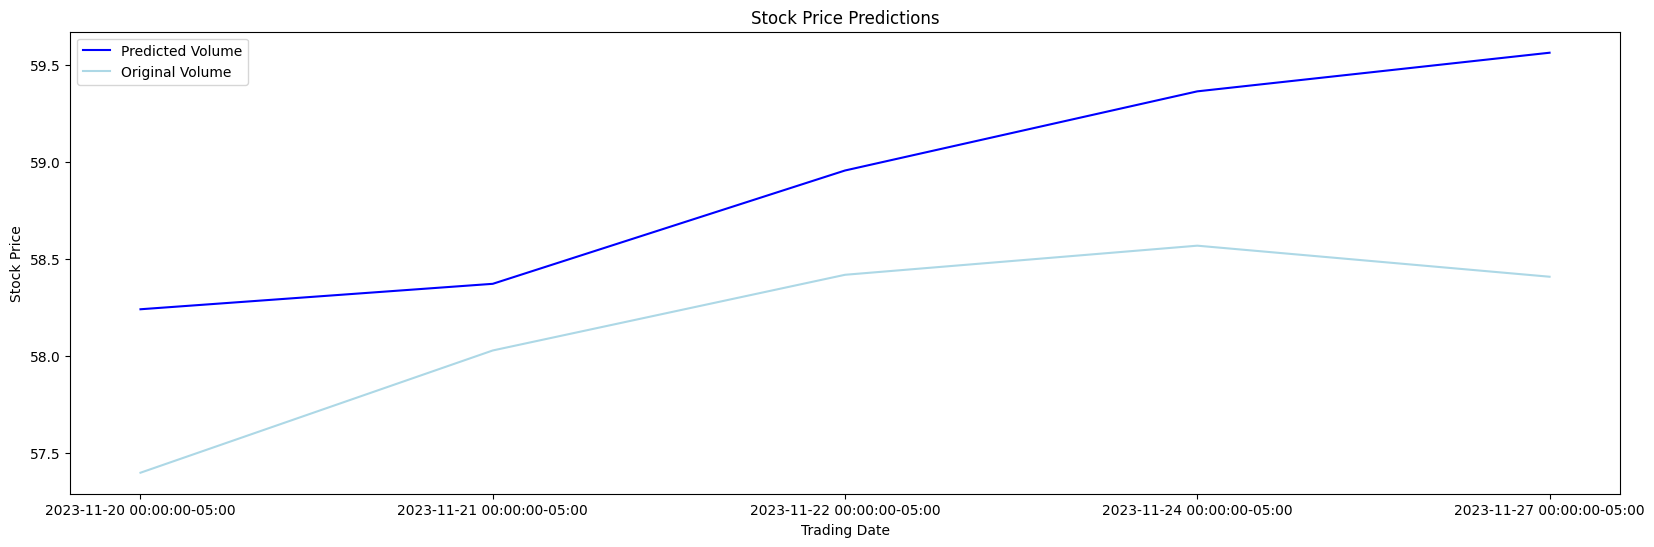

In [55]:
predicted_Price = regressor.predict(X_test)
predicted_Price = DataScaler.inverse_transform(predicted_Price)
 
# Getting the original price values for testing data
orig=y_test
orig=DataScaler.inverse_transform(y_test)
 
# Accuracy of the predictions
print('Accuracy:', 100 - (100*(abs(orig-predicted_Price)/orig)).mean())
 
# Visualising the results
import matplotlib.pyplot as plt
 
plt.plot(predicted_Price, color = 'blue', label = 'Predicted Volume')
plt.plot(orig, color = 'lightblue', label = 'Original Volume')
 
plt.title('Stock Price Predictions')
plt.xlabel('Trading Date')
plt.xticks(range(TestingRecords), ko_hist.tail(TestingRecords)['Date'])
plt.ylabel('Stock Price')
 
plt.legend()
fig=plt.gcf()
fig.set_figwidth(20)
fig.set_figheight(6)
plt.show()

1/1 [==============================] - 0s 31ms/step


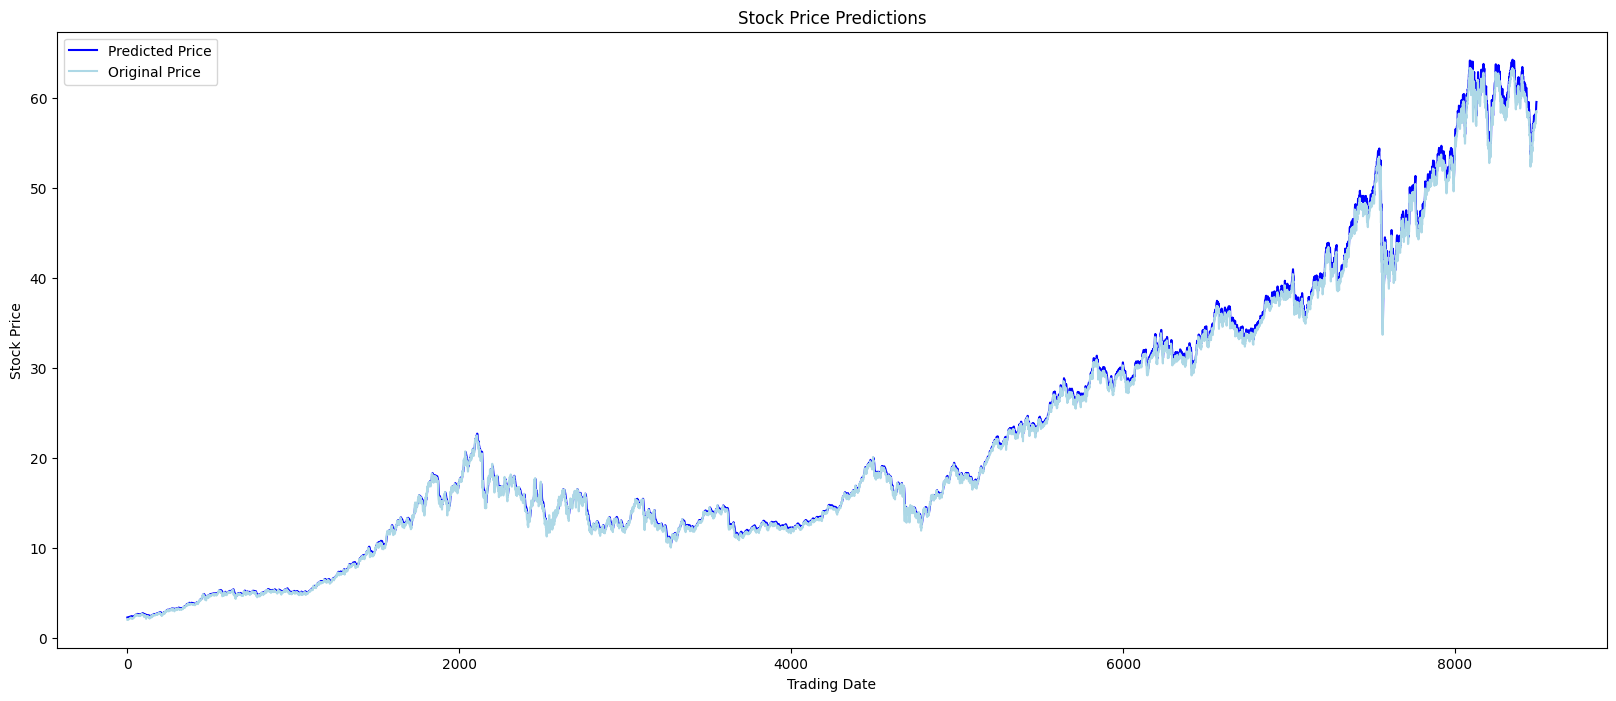

In [56]:

# Generating predictions on full data
TrainPredictions=DataScaler.inverse_transform(regressor.predict(X_train))
TestPredictions=DataScaler.inverse_transform(regressor.predict(X_test))
 
FullDataPredictions=np.append(TrainPredictions, TestPredictions)
FullDataOrig=FullData[TimeSteps:]
 
# plotting the full data
plt.plot(FullDataPredictions, color = 'blue', label = 'Predicted Price')
plt.plot(FullDataOrig , color = 'lightblue', label = 'Original Price')
 
 
plt.title('Stock Price Predictions')
plt.xlabel('Trading Date')
plt.ylabel('Stock Price')
plt.legend()
fig=plt.gcf()
fig.set_figwidth(20)
fig.set_figheight(8)
plt.show()

In [57]:
FullData[-51:-1]

array([[57.93999863],
       [58.29999924],
       [58.18000031],
       [58.43999863],
       [57.54000092],
       [57.59999847],
       [57.        ],
       [56.52999878],
       [55.95000076],
       [55.81000137],
       [55.97999954],
       [55.47999954],
       [54.88000107],
       [55.04000092],
       [52.38000107],
       [53.13999939],
       [52.88000107],
       [54.02999878],
       [53.70999908],
       [52.81000137],
       [52.88999939],
       [53.43000031],
       [54.06999969],
       [54.04999924],
       [54.34999847],
       [54.56999969],
       [54.08000183],
       [55.63999939],
       [56.11999893],
       [55.77999878],
       [55.24000168],
       [56.15000153],
       [56.49000168],
       [56.43999863],
       [57.09000015],
       [56.74000168],
       [56.97000122],
       [57.18000031],
       [57.09000015],
       [56.65999985],
       [56.72000122],
       [56.93000031],
       [57.09999847],
       [57.20999908],
       [57.15000153],
       [57

In [58]:

# Last 10 days prices
LastDays=FullData[-51:-1]
 
# Normalizing the data just like we did for training the model
LastDays=DataScaler.transform(LastDays.reshape(-1,1))
 
# Changing the shape of the data to 3D
# Choosing TimeSteps as 10 because we have used the same for training
NumSamples=1
TimeSteps=50
NumFeatures=1
LastDays=LastDays.reshape(NumSamples,TimeSteps,NumFeatures)
 
#############################
 
# Making predictions on data
predicted_Price = regressor.predict(LastDays)
predicted_Price = DataScaler.inverse_transform(predicted_Price)
predicted_Price

1/1 [==============================] - 0s 44ms/step


array([[59.564358]], dtype=float32)

In [59]:
diff = predicted_Price-FullData[-1]
diff[0][0]

1.15435791015625

# Modelos multi-step para predecir varios dias

In [60]:

# Considering the Full Data again which we extracted above
# Printing the last 10 values
print('Original Prices')
print(FullData[-50:])
 
print('###################')
 
# Printing last 10 values of the scaled data which we have created above for the last model
# Here I am changing the shape of the data to one dimensional array because
# for Multi step data preparation we need to X input in this fashion
X=X.reshape(X.shape[0],)
print('Scaled Prices')
print(X[-50:])

Original Prices
[[58.29999924]
 [58.18000031]
 [58.43999863]
 [57.54000092]
 [57.59999847]
 [57.        ]
 [56.52999878]
 [55.95000076]
 [55.81000137]
 [55.97999954]
 [55.47999954]
 [54.88000107]
 [55.04000092]
 [52.38000107]
 [53.13999939]
 [52.88000107]
 [54.02999878]
 [53.70999908]
 [52.81000137]
 [52.88999939]
 [53.43000031]
 [54.06999969]
 [54.04999924]
 [54.34999847]
 [54.56999969]
 [54.08000183]
 [55.63999939]
 [56.11999893]
 [55.77999878]
 [55.24000168]
 [56.15000153]
 [56.49000168]
 [56.43999863]
 [57.09000015]
 [56.74000168]
 [56.97000122]
 [57.18000031]
 [57.09000015]
 [56.65999985]
 [56.72000122]
 [56.93000031]
 [57.09999847]
 [57.20999908]
 [57.15000153]
 [57.25999832]
 [57.40000153]
 [58.02999878]
 [58.41999817]
 [58.56999969]
 [58.40999985]]
###################
Scaled Prices
[0.91831924 0.91636597 0.92059807 0.90594845 0.90692505 0.89715864
 0.88950824 0.88006738 0.87778855 0.88055568 0.87241698 0.86265057
 0.86525495 0.82195707 0.83432787 0.83009577 0.84881474 0.8436059

# Modelo para 5 dias

In [61]:

# Multi step data preparation
 
# split into samples
X_samples = list()
y_samples = list()
 
NumerOfRows = len(X)
TimeSteps=50  # next few day's Price Prediction is based on last how many past day's prices
FutureTimeSteps=5 # How many days in future you want to predict the prices
 
# Iterate thru the values to create combinations
for i in range(TimeSteps , NumerOfRows-FutureTimeSteps , 1):
    x_sample = X[i-TimeSteps:i]
    y_sample = X[i:i+FutureTimeSteps]
    X_samples.append(x_sample)
    y_samples.append(y_sample)
 
################################################
 
# Reshape the Input as a 3D (samples, Time Steps, Features)
X_data=np.array(X_samples)
X_data=X_data.reshape(X_data.shape[0],X_data.shape[1], 1)
print('### Input Data Shape ###') 
print(X_data.shape)
 
# We do not reshape y as a 3D data  as it is supposed to be a single column only
y_data=np.array(y_samples)
print('### Output Data Shape ###') 
print(y_data.shape)

### Input Data Shape ###
(8487, 50, 1)
### Output Data Shape ###
(8487, 5)


In [62]:

# Choosing the number of testing data records
TestingRecords=5
 
# Splitting the data into train and test
X_train=X_data[:-TestingRecords]
X_test=X_data[-TestingRecords:]
y_train=y_data[:-TestingRecords]
y_test=y_data[-TestingRecords:]
 
#############################################
# Printing the shape of training and testing
print('\n#### Training Data shape ####')
print(X_train.shape)
print(y_train.shape)
 
print('\n#### Testing Data shape ####')
print(X_test.shape)
print(y_test.shape)


#### Training Data shape ####
(8482, 50, 1)
(8482, 5)

#### Testing Data shape ####
(5, 50, 1)
(5, 5)


In [63]:

# Defining Input shapes for LSTM
TimeSteps=X_train.shape[1]
TotalFeatures=X_train.shape[2]
print("Number of TimeSteps:", TimeSteps)
print("Number of Features:", TotalFeatures)

Number of TimeSteps: 50
Number of Features: 1


In [64]:
keras.utils.set_random_seed(42) 
 
# Initialising the RNN
regressor_5 = Sequential()
 
# Adding the First input hidden layer and the LSTM layer
# return_sequences = True, means the output of every time step to be shared with hidden next layer
regressor_5.add(LSTM(units = 10, activation = 'tanh', input_shape = (TimeSteps, TotalFeatures), return_sequences=True))
 
 
# Adding the Second hidden layer and the LSTM layer
regressor_5.add(LSTM(units = 5, activation = 'relu', input_shape = (TimeSteps, TotalFeatures), return_sequences=True))
 
# Adding the Third hidden layer and the LSTM layer
regressor_5.add(LSTM(units = 5, activation = 'relu', return_sequences=False ))
 
 
# Adding the output layer
# Notice the number of neurons in the dense layer is now the number of future time steps 
# Based on the number of future days we want to predict
regressor_5.add(Dense(units = FutureTimeSteps))
 
# Compiling the RNN
regressor_5.compile(optimizer = 'adam', loss = 'mean_squared_error')
 
###################################################################
 
import time
# Measuring the time taken by the model to train
StartTime=time.time()
 
# Fitting the RNN to the Training set
regressor_5.fit(X_train, y_train, batch_size = 10, epochs = 20)
 
EndTime=time.time()
print("############### Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes #############')

Epoch 1/20
849/849 [==============================] - 22s 22ms/step - loss: 0.0102
Epoch 2/20
849/849 [==============================] - 19s 22ms/step - loss: 4.7619e-04
Epoch 3/20
849/849 [==============================] - 19s 23ms/step - loss: 4.2391e-04
Epoch 4/20
849/849 [==============================] - 19s 22ms/step - loss: 3.7009e-04
Epoch 5/20
849/849 [==============================] - 19s 22ms/step - loss: 3.2569e-04
Epoch 6/20
849/849 [==============================] - 19s 22ms/step - loss: 2.9515e-04
Epoch 7/20
849/849 [==============================] - 19s 22ms/step - loss: 2.8350e-04
Epoch 8/20
849/849 [==============================] - 19s 22ms/step - loss: 2.3173e-04
Epoch 9/20
849/849 [==============================] - 19s 22ms/step - loss: 2.3081e-04
Epoch 10/20
849/849 [==============================] - 19s 22ms/step - loss: 1.9025e-04
Epoch 11/20
849/849 [==============================] - 19s 22ms/step - loss: 1.7586e-04
Epoch 12/20
849/849 [========================

In [65]:
# Making predictions on test data
predicted_Price = regressor_5.predict(X_test)
predicted_Price = DataScaler.inverse_transform(predicted_Price)
print('#### Predicted Prices ####')
print(predicted_Price)
 
# Getting the original price values for testing data
orig=y_test
orig=DataScaler.inverse_transform(y_test)
print('\n#### Original Prices ####')
print(orig)

1/1 [==============================] - 1s 534ms/step
#### Predicted Prices ####
[[56.123142 56.075573 56.05148  55.988068 55.800148]
 [56.19494  56.135994 56.11538  56.01712  55.83625 ]
 [56.324104 56.262123 56.242645 56.134975 55.95175 ]
 [56.45541  56.395046 56.375286 56.272465 56.08339 ]
 [56.4845   56.434574 56.412064 56.3406   56.136974]]

#### Original Prices ####
[[56.93000031 57.09999847 57.20999908 57.15000153 57.25999832]
 [57.09999847 57.20999908 57.15000153 57.25999832 57.40000153]
 [57.20999908 57.15000153 57.25999832 57.40000153 58.02999878]
 [57.15000153 57.25999832 57.40000153 58.02999878 58.41999817]
 [57.25999832 57.40000153 58.02999878 58.41999817 58.56999969]]


In [66]:
# Making predictions on test data
LastDaysPrices=FullData[-55:-5]
 
# Reshaping the data to (-1,1 )because its a single entry
LastDaysPrices=LastDaysPrices.reshape(-1, 1)
 
# Scaling the data on the same level on which model was trained
X_test=DataScaler.transform(LastDaysPrices)
 
NumberofSamples=1
TimeSteps=X_test.shape[0]
NumberofFeatures=X_test.shape[1]
# Reshaping the data as 3D input
X_test=X_test.reshape(NumberofSamples,TimeSteps,NumberofFeatures)
 
# Generating the predictions for next 5 days
Next5DaysPrice = regressor_5.predict(X_test)
 
# Generating the prices in original scale
Next5DaysPrice = DataScaler.inverse_transform(Next5DaysPrice)
Next5DaysPrice

1/1 [==============================] - 0s 56ms/step


array([[56.586113, 56.52746 , 56.50732 , 56.40974 , 56.216076]],
      dtype=float32)

In [67]:
valid_5 = FullData[-5:]

Next5Days = Next5DaysPrice[0]


mse_ls = []

for x in zip(valid_5,Next5Days):
    mse_ls.append(x[0][0]-x[1])


print(np.average(mse_ls))

1.7166580200195312


In [68]:
last50.Date.iloc[-6]

Timestamp('2023-11-16 00:00:00-0500', tz='America/New_York')

In [69]:
last50 = ko_hist.tail(50)[['Date','Close']]

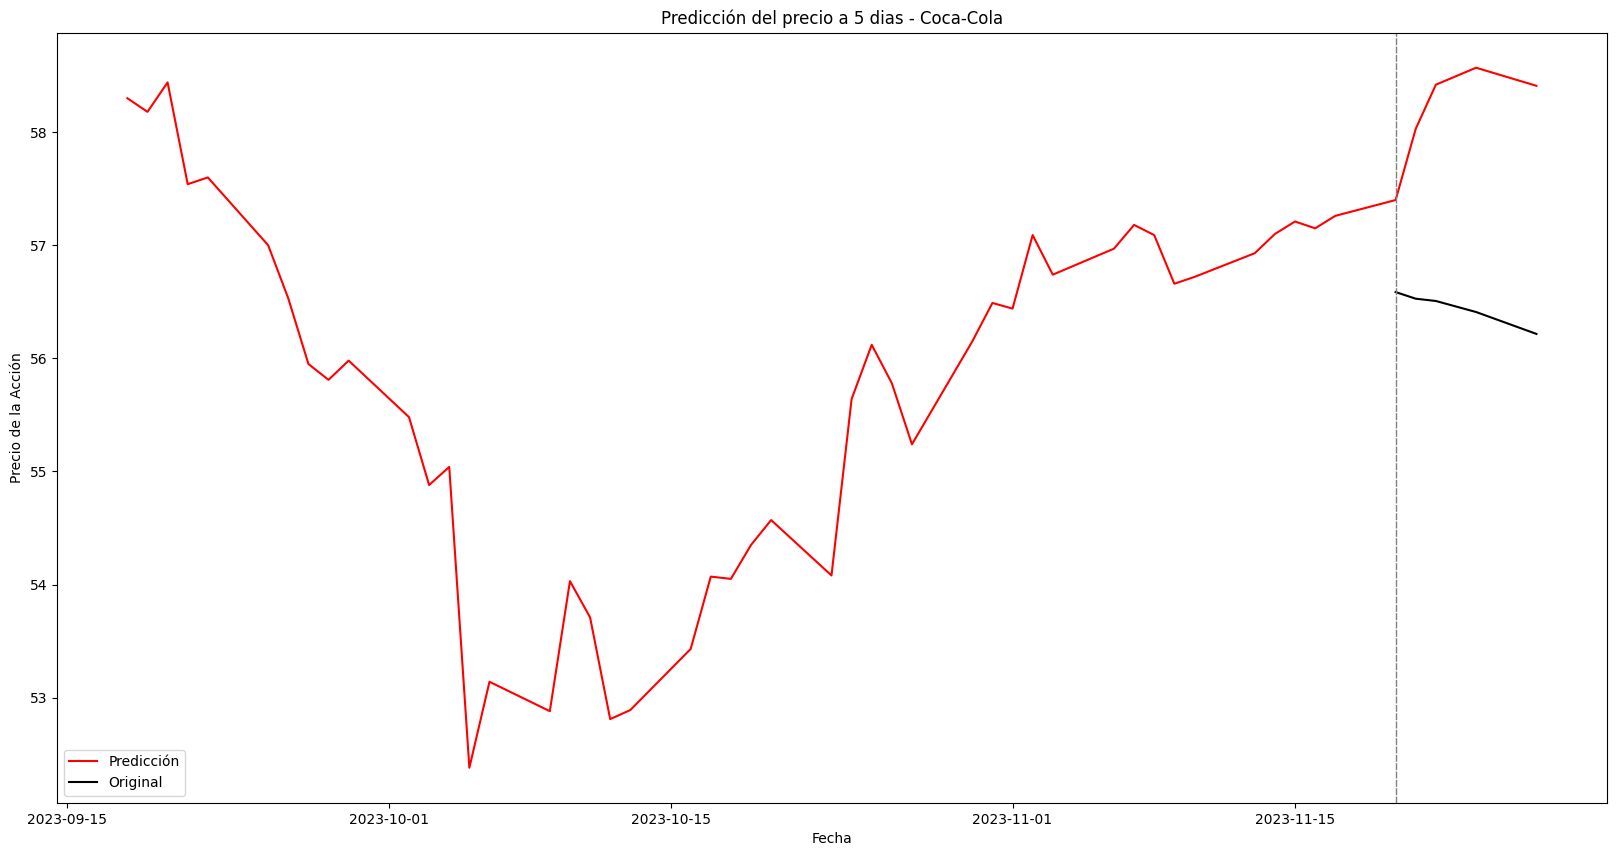

In [70]:
# Visualising the results
plt.plot(last50.Date,last50.Close, color = 'red', label = 'Predicción')
plt.plot(last50.Date.tail(5),Next5Days, color = 'black', label = 'Original')
plt.axvline(last50.Date.iloc[-5],linestyle=(0, (5, 1)), linewidth=1, color="gray")

plt.title('Predicción del precio a 5 dias - Coca-Cola')
plt.xlabel('Fecha')

#startDateIndex=(FutureTimeSteps*TestingRecords)-FutureTimeSteps*(i+1)
#endDateIndex=(FutureTimeSteps*TestingRecords)-FutureTimeSteps*(i+1) + FutureTimeSteps
TotalRows=ko_hist.shape[0]

#plt.xticks(last120.Date)
plt.ylabel('Precio de la Acción')

plt.legend()
fig=plt.gcf()
fig.set_figwidth(20)
fig.set_figheight(10)
plt.show()

# Modelo para 20 dias

In [71]:

# Multi step data preparation
 
# split into samples
X_samples = list()
y_samples = list()
 
NumerOfRows = len(X)
TimeSteps=120  # next few day's Price Prediction is based on last how many past day's prices
FutureTimeSteps=20 # How many days in future you want to predict the prices
 
# Iterate thru the values to create combinations
for i in range(TimeSteps , NumerOfRows-FutureTimeSteps , 1):
    x_sample = X[i-TimeSteps:i]
    y_sample = X[i:i+FutureTimeSteps]
    X_samples.append(x_sample)
    y_samples.append(y_sample)
 
################################################
 
# Reshape the Input as a 3D (samples, Time Steps, Features)
X_data=np.array(X_samples)
X_data=X_data.reshape(X_data.shape[0],X_data.shape[1], 1)
print('### Input Data Shape ###') 
print(X_data.shape)
 
# We do not reshape y as a 3D data  as it is supposed to be a single column only
y_data=np.array(y_samples)
print('### Output Data Shape ###') 
print(y_data.shape)

### Input Data Shape ###
(8402, 120, 1)
### Output Data Shape ###
(8402, 20)


In [72]:

# Choosing the number of testing data records
TestingRecords=20
 
# Splitting the data into train and test
X_train=X_data[:-TestingRecords]
X_test=X_data[-TestingRecords:]
y_train=y_data[:-TestingRecords]
y_test=y_data[-TestingRecords:]
 
#############################################
# Printing the shape of training and testing
print('\n#### Training Data shape ####')
print(X_train.shape)
print(y_train.shape)
 
print('\n#### Testing Data shape ####')
print(X_test.shape)
print(y_test.shape)


#### Training Data shape ####
(8382, 120, 1)
(8382, 20)

#### Testing Data shape ####
(20, 120, 1)
(20, 20)


In [73]:

# Defining Input shapes for LSTM
TimeSteps=X_train.shape[1]
TotalFeatures=X_train.shape[2]
print("Number of TimeSteps:", TimeSteps)
print("Number of Features:", TotalFeatures)

Number of TimeSteps: 120
Number of Features: 1


In [74]:
keras.utils.set_random_seed(42) 

# Initialising the RNN
regressor_20 = Sequential()
 
# Adding the First input hidden layer and the LSTM layer
# return_sequences = True, means the output of every time step to be shared with hidden next layer
regressor_20.add(LSTM(units = 10, activation = 'tanh', input_shape = (TimeSteps, TotalFeatures), return_sequences=True))
 
 
# Adding the Second hidden layer and the LSTM layer
regressor_20.add(LSTM(units = 5, activation = 'relu', input_shape = (TimeSteps, TotalFeatures), return_sequences=True))
 
# Adding the Third hidden layer and the LSTM layer
regressor_20.add(LSTM(units = 5, activation = 'relu', return_sequences=False ))
 
 
# Adding the output layer
# Notice the number of neurons in the dense layer is now the number of future time steps 
# Based on the number of future days we want to predict
regressor_20.add(Dense(units = FutureTimeSteps))
 
# Compiling the RNN
regressor_20.compile(optimizer = 'adam', loss = 'mean_squared_error')
 
###################################################################
 
import time
# Measuring the time taken by the model to train
StartTime=time.time()
 
# Fitting the RNN to the Training set
regressor_20.fit(X_train, y_train, batch_size = 10, epochs = 20)
 
EndTime=time.time()
print("############### Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes #############')

Epoch 1/20
839/839 [==============================] - 50s 56ms/step - loss: 0.0280
Epoch 2/20
839/839 [==============================] - 47s 56ms/step - loss: 0.0011
Epoch 3/20
839/839 [==============================] - 47s 56ms/step - loss: 6.8265e-04
Epoch 4/20
839/839 [==============================] - 47s 56ms/step - loss: 5.7909e-04
Epoch 5/20
839/839 [==============================] - 47s 56ms/step - loss: 5.3318e-04
Epoch 6/20
839/839 [==============================] - 47s 56ms/step - loss: 5.0798e-04
Epoch 7/20
839/839 [==============================] - 47s 56ms/step - loss: 4.9311e-04
Epoch 8/20
839/839 [==============================] - 47s 56ms/step - loss: 4.6537e-04
Epoch 9/20
839/839 [==============================] - 47s 56ms/step - loss: 4.1995e-04
Epoch 10/20
839/839 [==============================] - 48s 57ms/step - loss: 3.9911e-04
Epoch 11/20
839/839 [==============================] - 48s 57ms/step - loss: 4.0157e-04
Epoch 12/20
839/839 [============================

In [75]:
# Making predictions on test data
predicted_Price = regressor_20.predict(X_test)
predicted_Price = DataScaler.inverse_transform(predicted_Price)
print('#### Predicted Prices ####')
print(predicted_Price)
 
# Getting the original price values for testing data
orig=y_test
orig=DataScaler.inverse_transform(y_test)
print('\n#### Original Prices ####')
print(orig)

1/1 [==============================] - 1s 592ms/step
#### Predicted Prices ####
[[56.005577 55.839237 56.078526 55.871746 55.887287 55.588364 55.063663
  55.60056  55.09221  55.90272  55.531746 55.244682 55.30892  55.595943
  55.609993 56.07463  55.51666  55.69037  55.38807  55.666264]
 [55.60877  55.462074 55.753975 55.520508 55.560432 55.221867 54.65001
  55.233345 54.694527 55.561382 55.173283 54.86364  54.950058 55.269016
  55.24561  55.742695 55.150204 55.343292 55.00939  55.302235]
 [55.147774 54.99379  55.339867 55.083855 55.133026 54.772713 54.152508
  54.78676  54.196724 55.15265  54.730556 54.39604  54.50114  54.840607
  54.799137 55.344975 54.698547 54.915676 54.558743 54.874344]
 [54.87401  54.730064 55.154713 54.861427 54.936203 54.52849  53.836323
  54.543377 53.89325  54.95637  54.49649  54.126328 54.26177  54.64162
  54.55846  55.16412  54.45202  54.70145  54.302574 54.646152]
 [53.72512  53.528694 53.963978 53.67782  53.724163 53.351776 52.65511
  53.374397 52.679268 5

In [76]:
# Making predictions on test data
LastDaysPrices=FullData[-140:-20]
 
# Reshaping the data to (-1,1 )because its a single entry
LastDaysPrices=LastDaysPrices.reshape(-1, 1)
 
# Scaling the data on the same level on which model was trained
X_test=DataScaler.transform(LastDaysPrices)
 
NumberofSamples=1
TimeSteps=X_test.shape[0]
NumberofFeatures=X_test.shape[1]
# Reshaping the data as 3D input
X_test=X_test.reshape(NumberofSamples,TimeSteps,NumberofFeatures)
 
# Generating the predictions for next 5 days
Next20DaysPrice = regressor_20.predict(X_test)
 
# Generating the prices in original scale
Next20DaysPrice = DataScaler.inverse_transform(Next20DaysPrice)
Next20DaysPrice

1/1 [==============================] - 0s 64ms/step


array([[56.677773, 56.764706, 56.649796, 56.560287, 56.63141 , 56.344383,
        56.147087, 56.31812 , 56.298084, 56.2846  , 56.263737, 56.157402,
        56.12957 , 56.364384, 56.344433, 56.371174, 56.312496, 56.294777,
        56.082886, 56.149387]], dtype=float32)

In [77]:
valid_20 = FullData[-20:]

Next20Days = Next20DaysPrice[0]

mse_ls = []

for x in zip(valid_20,Next20Days):
    mse_ls.append(x[0][0]-x[1])

print(np.average(mse_ls))

0.8431756973266602


In [78]:
last120 = ko_hist.tail(120)[['Date','Close']]

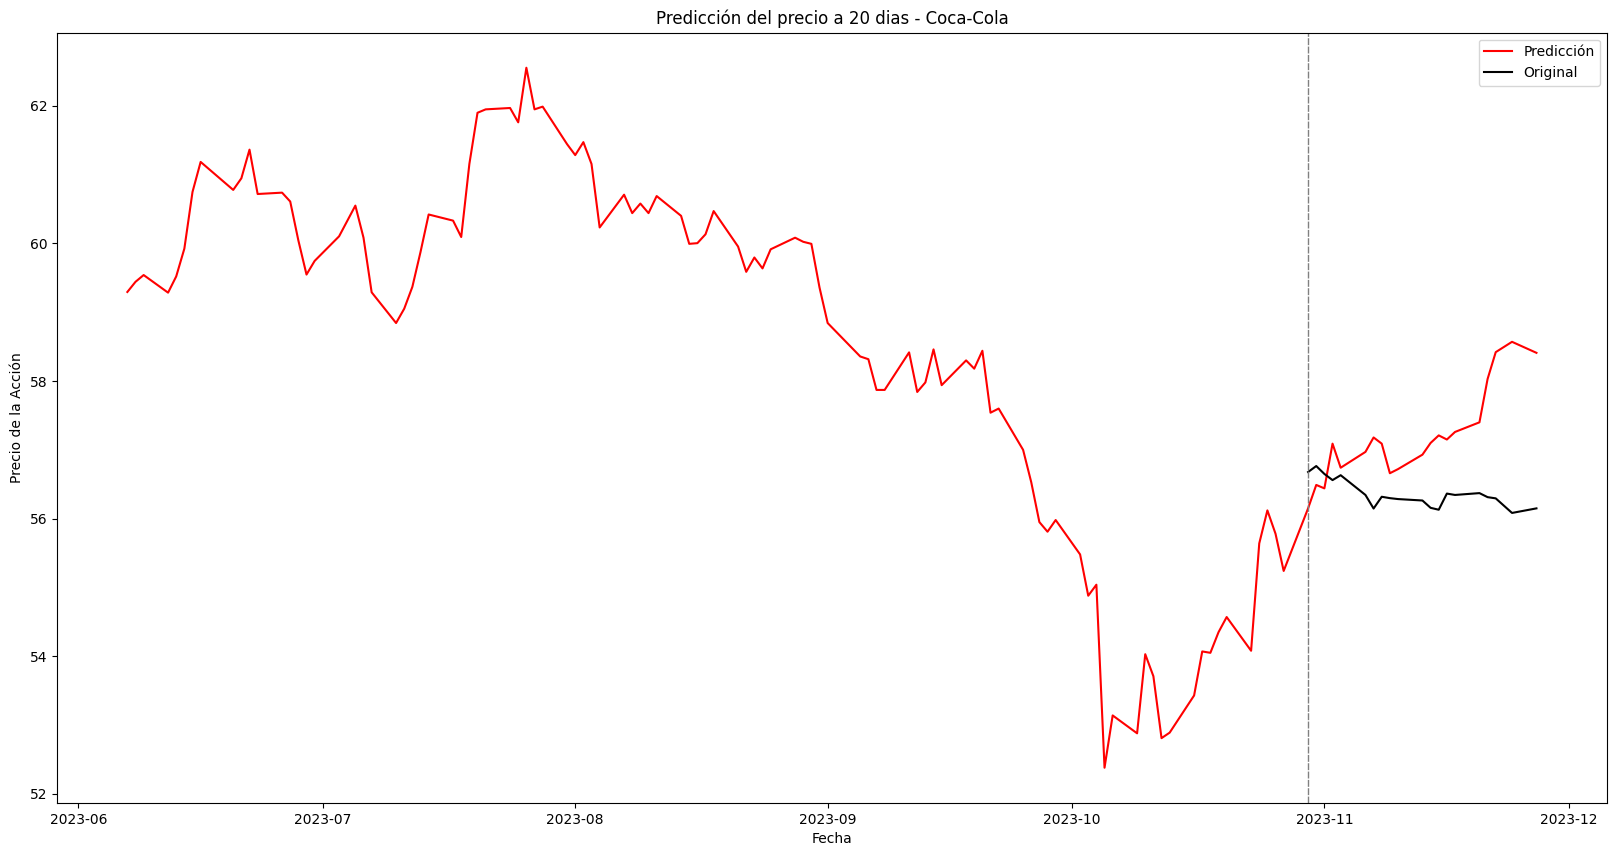

In [79]:
# Visualising the results
plt.plot(last120.Date,last120.Close, color = 'red', label = 'Predicción')
plt.plot(last120.Date.tail(20),Next20Days, color = 'black', label = 'Original')
plt.axvline(last120.Date.iloc[-20],linestyle=(0, (5, 1)), linewidth=1, color="gray")

plt.title('Predicción del precio a 20 dias - Coca-Cola')
plt.xlabel('Fecha')

#startDateIndex=(FutureTimeSteps*TestingRecords)-FutureTimeSteps*(i+1)
#endDateIndex=(FutureTimeSteps*TestingRecords)-FutureTimeSteps*(i+1) + FutureTimeSteps
TotalRows=ko_hist.shape[0]

#plt.xticks(last120.Date)
plt.ylabel('Precio de la Acción')

plt.legend()
fig=plt.gcf()
fig.set_figwidth(20)
fig.set_figheight(10)
plt.show()